<a href="https://colab.research.google.com/github/bruno-camara/Design_Patterns-CoR_Observer_Exercise/blob/main/exercise_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📈 Regressão Logística

Grupo:

- 11257230 - Bruno Carneiro Camara
- 11259715 - Vanderson da Silva dos Santos

Classe: PCS3838 - Inteligência Artificial (2024)

<br>

---

# Regressão Logística

In [ ]:
!pip install ucimlrepo torchinfo torchview

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

## Dataset Treatment

In [ ]:
# fetch dataset
tic_tac_toe_endgame = fetch_ucirepo(id=101)

# data (as pandas dataframes)
X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

# Converter dados categóricos em X e y usando LabelEncoder
le_X = LabelEncoder()
for column in X.columns:
    X.loc[:, column] = le_X.fit_transform(X[column].astype(str))

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Convertendo para tensores do PyTorch
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Criando datasets e dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Model Train

In [ ]:
# Definição do modelo de Regressão Logística
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 2)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.linear(x)
        return self.softmax(x)

# Instanciando o modelo
logistic_model = LogisticRegressionModel()

# Definindo o otimizador e a função de perda
learning_rate = 0.001
optimizer_logistic = optim.Adam(logistic_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

def train_model(model, optimizer, train_loader, criterion, epochs=10):
    model.train()
    losses = []  # Lista para armazenar as perdas
    for epoch in range(epochs):
        total_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        average_loss = total_loss / len(train_loader)
        losses.append(average_loss)
        print(f'Epoch {epoch+1}, Loss: {average_loss}')
    return losses

# Treinando os modelos
num_epochs = 2000
losses = train_model(logistic_model, optimizer_logistic, train_loader, criterion, num_epochs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1, Loss: 0.656508594751358
Epoch 2, Loss: 0.6514315704504648
Epoch 3, Loss: 0.6487805595000585
Epoch 4, Loss: 0.6468456437190374
Epoch 5, Loss: 0.6457283198833466
Epoch 6, Loss: 0.6450632512569427
Epoch 7, Loss: 0.6442025552193323
Epoch 8, Loss: 0.6435333639383316
Epoch 9, Loss: 0.643021340171496
Epoch 10, Loss: 0.642510861158371
Epoch 11, Loss: 0.6418258746465048
Epoch 12, Loss: 0.6412380735079447
Epoch 13, Loss: 0.6407389988501867
Epoch 14, Loss: 0.6401738971471786
Epoch 15, Loss: 0.6395952155192693
Epoch 16, Loss: 0.6392461061477661
Epoch 17, Loss: 0.6386309315760931
Epoch 18, Loss: 0.6382139772176743
Epoch 19, Loss: 0.6375381449858347
Epoch 20, Loss: 0.6370566040277481
Epoch 21, Loss: 0.6366836378971735
Epoch 22, Loss: 0.6360736389954885
Epoch 23, Loss: 0.6355181684096655
Epoch 24, Loss: 0.6350279748439789
Epoch 25, Loss: 0.6345200637976328
Epoch 26, Loss: 0.6340976506471634
Epoch 27, Loss: 0.6338104903697968
Epoch 28, Loss: 0.6332715749740601
Epoch 29, Loss: 0.63260975976785

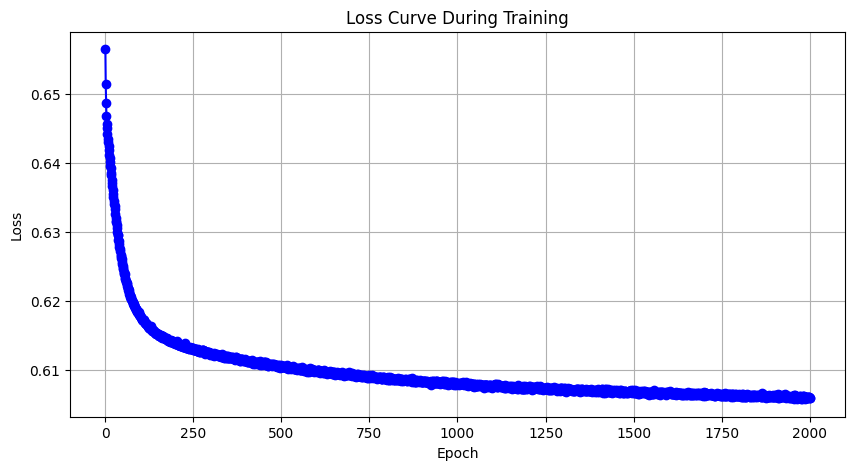

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(losses, epochs):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), losses, marker='o', linestyle='-', color='b')
    plt.title('Loss Curve During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss_curve(losses, num_epochs)

## Model Evaluation

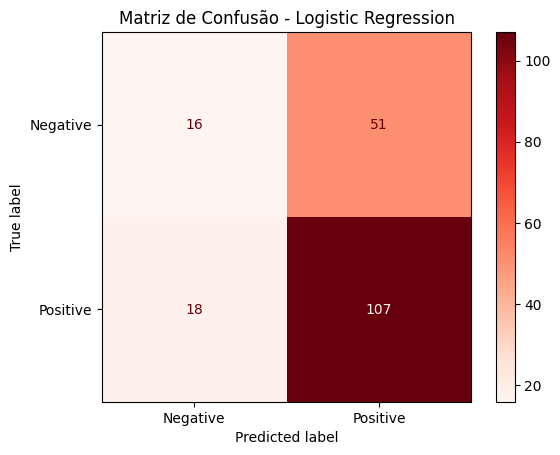

{'Model': 'Logistic Regression', 'Accuracy': 0.640625, 'Precision': 0.6772151898734177, 'Recall': 0.856}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_model(model, X_test_tensor, y_test, model_name):
    """
    Avalia o desempenho de um modelo PyTorch e plota a matriz de confusão.

    Args:
    - model (torch.nn.Module): Modelo treinado para avaliação.
    - X_test_tensor (torch.Tensor): Conjunto de características de teste.
    - y_test (array-like): Rótulos verdadeiros de teste.
    - model_name (str): Nome do modelo para exibição nos gráficos.

    Returns:
    - metrics (dict): Dicionário com acurácia, precisão e recall do modelo.
    """
    with torch.no_grad():
        model.eval()
        predictions = model(X_test_tensor)
        predicted_classes = torch.argmax(predictions, dim=1).numpy()

        # Calculando métricas
        accuracy = accuracy_score(y_test, predicted_classes)
        precision = precision_score(y_test, predicted_classes)
        recall = recall_score(y_test, predicted_classes)

        # Matriz de confusão
        cm = confusion_matrix(y_test, predicted_classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

        # Plotando a matriz de confusão
        disp.plot(cmap='Reds')
        plt.title(f'Matriz de Confusão - {model_name}')
        plt.show()

        metrics = {
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall
        }
        return metrics


metrics = eval_model(logistic_model, X_test_tensor, y_test, "Logistic Regression")

print(metrics)

## Model Visualization

In [ ]:
from torchview import draw_graph
from torchinfo import summary

summary(logistic_model)

Layer (type:depth-idx)                   Param #
LogisticRegressionModel                  --
├─Linear: 1-1                            20
├─Softmax: 1-2                           --
Total params: 20
Trainable params: 20
Non-trainable params: 0

/usr/local/lib/python3.10/dist-packages/torch/overrides.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = torch_func_method(public_api, types, args, kwargs)


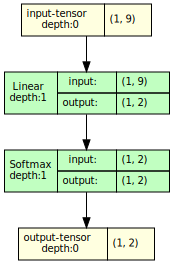

In [ ]:
model_graph = draw_graph(logistic_model, input_size=(1, X.shape[1]), roll=True)
model_graph.visual_graph

In [ ]:
X.columns

Index(['top-left-square', 'top-middle-square', 'top-right-square',
       'middle-left-square', 'middle-middle-square', 'middle-right-square',
       'bottom-left-square', 'bottom-middle-square', 'bottom-right-square'],
      dtype='object')

In [ ]:
model_graph.visual_graph.render('lr-architecture', format='png', cleanup=True)

'lr-architecture.png'